System Solved in ℏ=1 and unit mass, m=1 units for Schrödinger Equation in Finite Difference method. 

$$ [ℏ^2/2ma^2 (D⊕D)+V(ax,ay)] ψ_n (ax,ay)=E_n ψ_n (ax,ay) $$
$$ where,  D_{x_iy_j} = Δ_{ij}/h^2 $$

with Boundary Condition Mapping, from (-∞, ∞) to (-a, a) by rescaling x to x/a and y to y/a, dimensionless variables

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from scipy import sparse
from scipy.sparse.linalg import eigsh
from scipy.sparse.linalg import eigs

In [2]:
a = 1
N = a*100
h = 1/N
X, Y = np.meshgrid(np.linspace(-a,a,N, dtype=float), np.linspace(-a,a,N, dtype=float))

In [3]:
def V(x, y):
    k = 0.1
    return 0.5*k*( (x**2) + (y**2) )

In [4]:
diag = np.ones([N])
diags = np.array([diag, -2*diag, diag])
D = sparse.spdiags(diags, np.array([-1,0,1]), N, N)
T = -1/(2*(a*h)**2) * sparse.kronsum(D,D)
U = sparse.diags(V(X,Y).reshape(N**2), (0))
H = T + U

In [5]:
n = 10
eigenvalues, eigenvectors = eigsh(H, k = n, which = 'SM')

In [6]:
def psi(n):
    return eigenvectors.T[n].reshape((N,N))

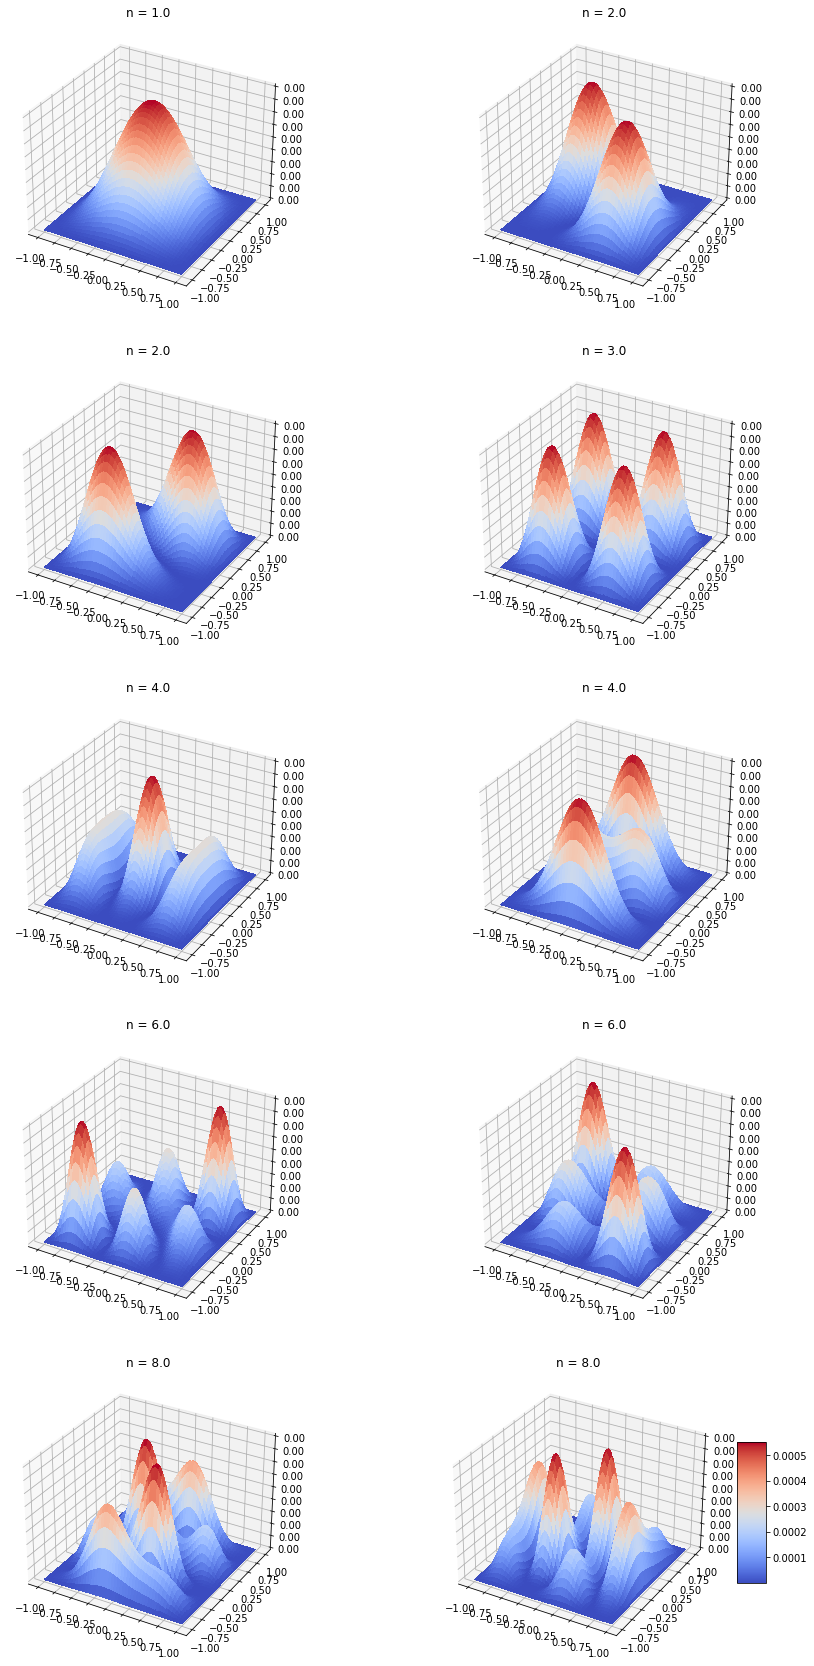

In [7]:
fig, ax = plt.subplots(n//2, 2, subplot_kw={"projection": "3d"}, figsize=(15, 30))

for i in range(n//2):
    ax[i][0].title.set_text('n = {0}'.format(np.trunc(eigenvalues[2*i]/eigenvalues[0])))
    surf = ax[i][0].plot_surface(X, Y, psi(2*i)**2, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    ax[i][0].zaxis.set_major_locator(LinearLocator(10))
    ax[i][0].zaxis.set_major_formatter('{x:.02f}')
    
    ax[i][1].title.set_text('n = {0}'.format(np.trunc(eigenvalues[2*i + 1]/eigenvalues[0])))
    surf = ax[i][1].plot_surface(X, Y, psi(2*i + 1)**2, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    ax[i][1].zaxis.set_major_locator(LinearLocator(10))
    ax[i][1].zaxis.set_major_formatter('{x:.02f}')
    
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

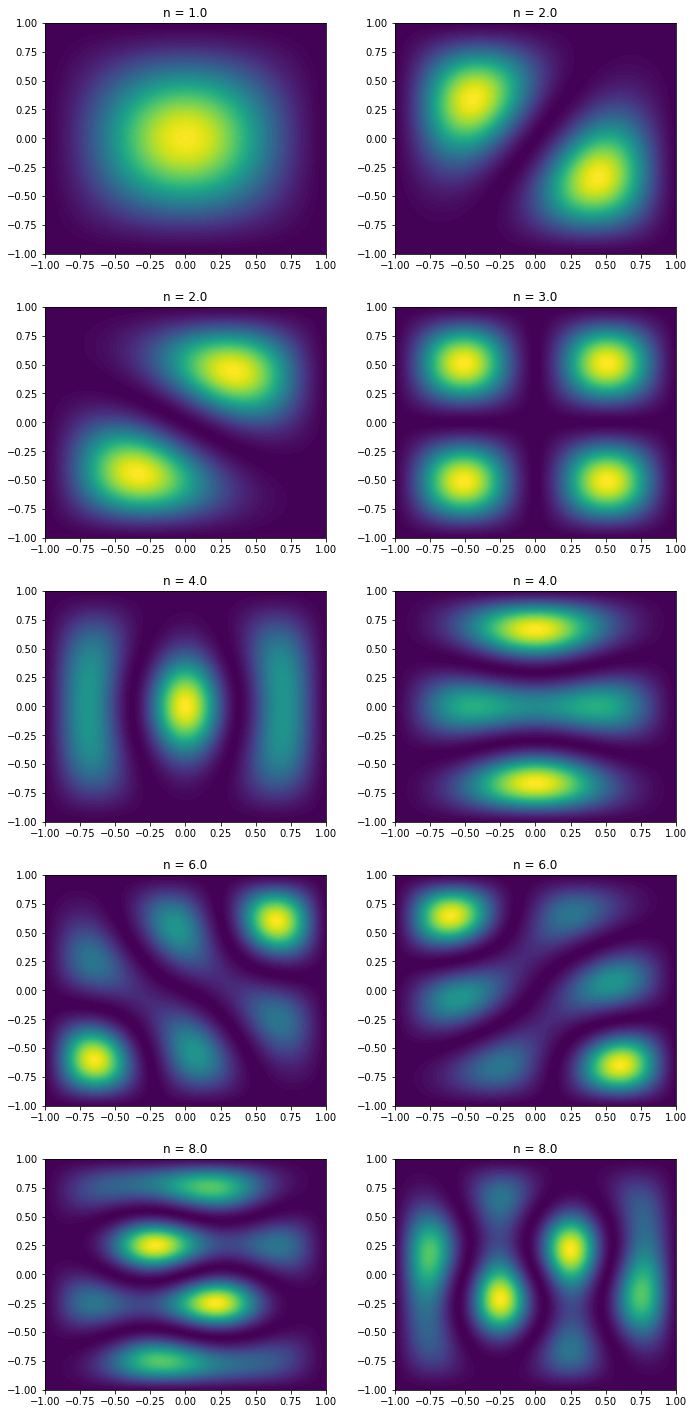

In [8]:
fig, ax = plt.subplots(n//2, 2, figsize = (10, 20))

for i in range(n//2):
    ax[i][0].title.set_text('n = {0}'.format(np.trunc(eigenvalues[2*i]/eigenvalues[0])))
    ax[i][0].contourf(X, Y, psi(2*i)**2, 100)
    ax[i][1].title.set_text('n = {0}'.format(np.trunc(eigenvalues[2*i + 1]/eigenvalues[0])))
    ax[i][1].contourf(X, Y, psi(2*i + 1)**2, 100)

fig.tight_layout(pad=2.0)
plt.show()